In [96]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# Modulo de optimización de scipy
from scipy import optimize

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [97]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [98]:
#Carga de dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [99]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [101]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [102]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [103]:
# Lectura de Datos
X = data.iloc[:, 1:4]
y = data.iloc[:, 4]
m = y.size

print(X)
print('*'*25)
print(y)

     Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]
*************************
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [104]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [105]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [106]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X[5])

[1.0e+00 1.0e+00 2.7e+01 5.8e+04]


In [107]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [108]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero

theta calculado por el descenso por el gradiente: [ -0.255      -0.155475   -0.2320125 -55.66875  ]
Una persona: 1 de edad: 20 con un sueldo de: 20000 (usando el descenso por el gradiente):0.0


C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\hp\AppData\Local\Temp\ipykernel_14764\2268448176.py:7: RuntimeWarning: divide by zero

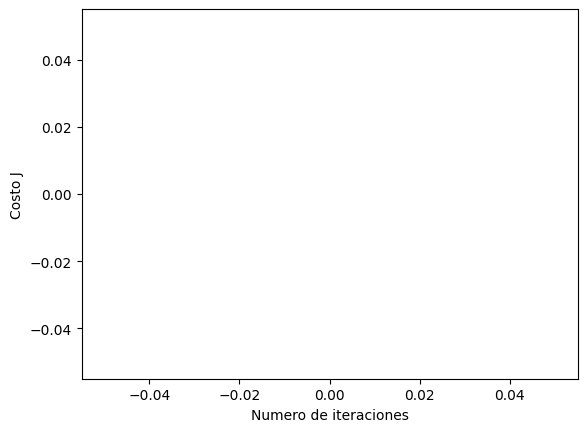

In [109]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(4)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1, 20, 20000]
compra = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Una persona: {X_array[1]} de edad: {X_array[2]} con un sueldo de: {X_array[3]} (usando el descenso por el gradiente):{compra}")

In [110]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [111]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[1.42500e-01 8.00000e-02 2.24250e+00 4.02875e+03]
Gradiente en theta inicial (zeros):
	[0.1425, 0.0800, 2.2425]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [112]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1.0e+00, 1.0e+00, 2.7e+01, 5.8e+04])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[1.0e+00 1.0e+00 2.7e+01 5.8e+04]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.642, 0.325, 21.070]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


C:\Users\hp\AppData\Local\Temp\ipykernel_14764\1056559099.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


In [113]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.357
Costo esperado (aproximado): 0.203

theta:
	[-9.097, -0.017, 0.169]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


C:\Users\hp\AppData\Local\Temp\ipykernel_14764\1765194797.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [121]:
# verificar si ingresa o no a la universidad
X_array = [1, 1, 20, 20000]
theta_om = [-9.097, -0.017, 0.169, 0.240]
compra = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto
print(f"Una persona: {X_array[1]} de edad: {X_array[2]} con un sueldo de: {X_array[3]} (usando el descenso por el gradiente):{compra}")
if(compra ==1): print('Si compra en la tienda')
else : print('No compra en la tineda')

Una persona: 1 de edad: 20 con un sueldo de: 20000 (usando el descenso por el gradiente):1.0
Si compra en la tienda
